In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

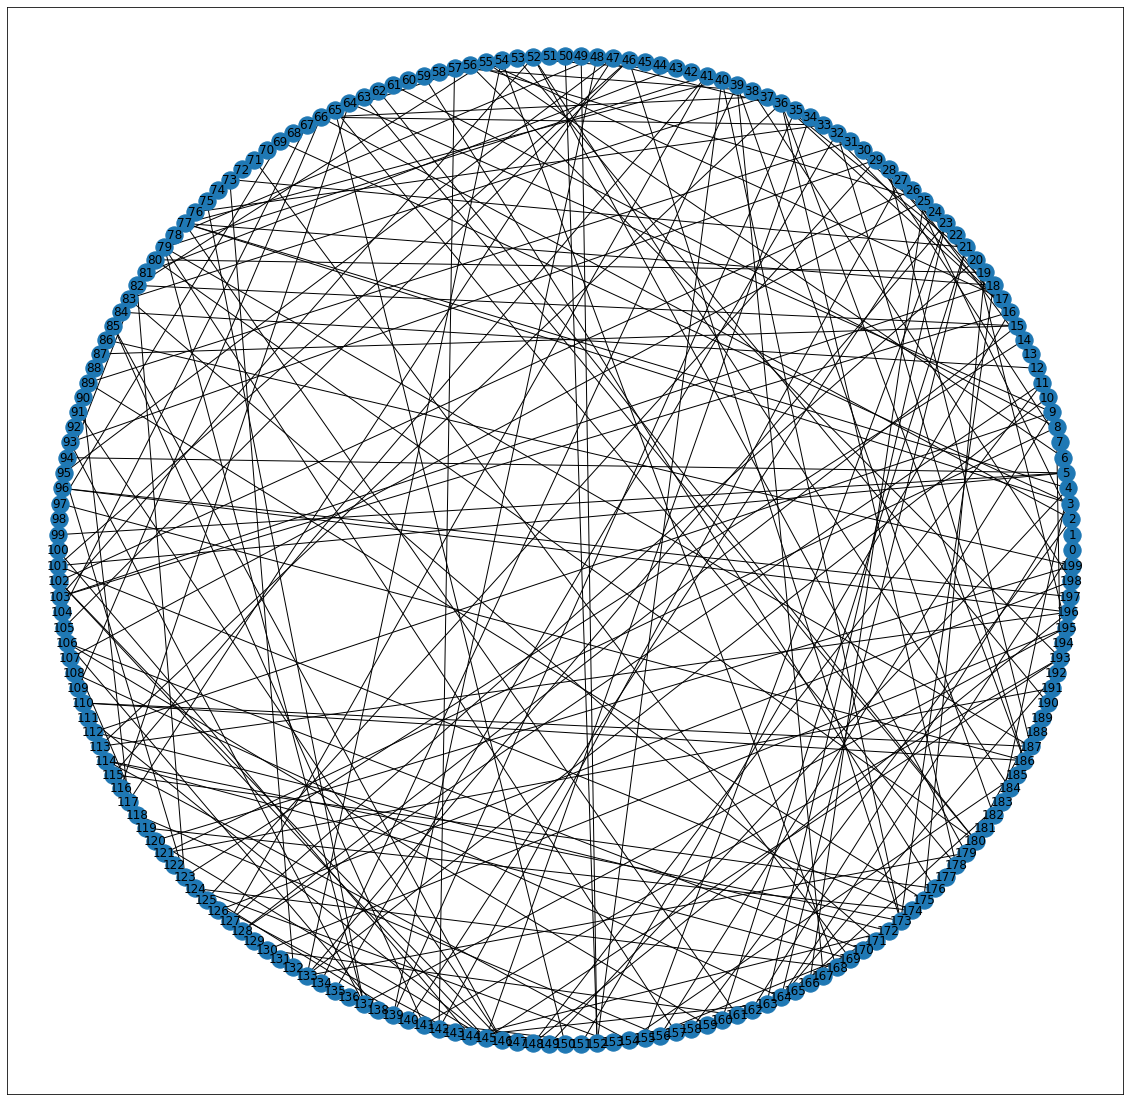

In [3]:
G = nx.watts_strogatz_graph(200, 4, 0.5, seed=0)
pos = nx.circular_layout(G)
plt.figure(figsize=(20, 20))
nx.draw_networkx(G, pos)

df = pd.DataFrame(nx.floyd_warshall_numpy(G))

In [4]:
pieces = []
for col in df.columns[0:99]:
    tmp_series = df[col].value_counts()
    tmp_series.name = col
    pieces.append(tmp_series)
df_value_counts = pd.concat(pieces, axis=1)
df_value_counts["sum"] = df_value_counts.sum(axis=1)
df_value_counts

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,sum
0.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1,1,1.0,...,1,1,1,1.0,1,1,1.0,1.0,1,99.0
1.0,4.0,4.0,5.0,5.0,4.0,4,3.0,2,5,4.0,...,4,5,4,4.0,3,3,5.0,4.0,4,416.0
2.0,12.0,11.0,15.0,16.0,15.0,10,11.0,9,14,13.0,...,10,11,8,13.0,10,10,11.0,15.0,10,1211.0
3.0,31.0,32.0,44.0,37.0,34.0,31,36.0,28,34,30.0,...,24,33,27,33.0,19,28,30.0,32.0,25,3187.0
4.0,69.0,63.0,76.0,66.0,69.0,66,68.0,55,61,62.0,...,58,53,47,62.0,54,62,62.0,71.0,56,6218.0
5.0,71.0,68.0,52.0,61.0,71.0,67,62.0,64,63,70.0,...,68,66,70,65.0,79,65,65.0,60.0,74,6353.0
6.0,12.0,21.0,7.0,14.0,6.0,19,19.0,38,20,20.0,...,33,29,41,22.0,33,29,26.0,17.0,29,2189.0
7.0,NaN,NaN,NaN,NaN,NaN,2,NaN,3,2,NaN,...,2,2,2,NaN,1,2,NaN,NaN,1,127.0


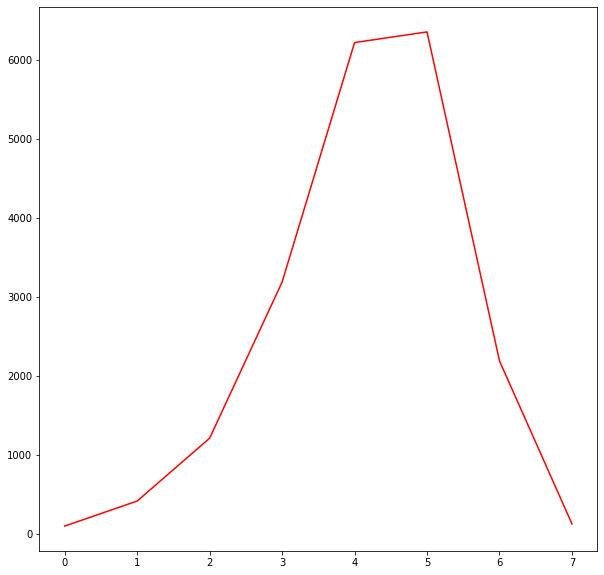

In [5]:
plt.figure(figsize=(10, 10))
plt.plot([0, 1, 2, 3, 4, 5, 6, 7], df_value_counts["sum"], color="red")